In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 15)
import os
import pickle_utils as pu
from IPython.display import display

# The methods that are compared in this notebook are:

* GMM: (Variational) Gaussian Mixture Model, learned directly from the data including the missing values
* GP_KNN: Gaussian Process, computing the kernel by kernel-weighted mean of the pairwise kernels between the $k$ nearest neighbours. That is: for every pair of points, for every $k$ neighbours of each point of the pair, compute the $k^2$ kernels and average them, with weight proportional to the kernel bet ween the pair of points.
* GP_mog: GP with the Expected Kernel over the GMM
* MICE, MissForest_mult: multiple imputation with MICE and MissForest
* mean: Just a mean of 0 and a std. deviation of 1.

In [338]:
experiment_2_dfs = []
for i in range(15):
    try:
        experiment_2_dfs.append(pu.load("REPORT_VALUES/expe2/comp_{:02d}.pkl.gz".format(i)))
        experiment_2_dfs.append(pu.load("REPORT_VALUES/expe1/comp_{:02d}.pkl.gz".format(i)))
    except FileNotFoundError:
        pass

experiment_2_dfs.append(pu.load("REPORT_VALUES/prior/res01.pkl.gz"))
experiment_2_dfs.append(pu.load("REPORT_VALUES/prior/res02.pkl.gz"))

In [339]:
df_concat = pd.concat(experiment_2_dfs, axis=0)
grouped_df_concat = df_concat.groupby(df_concat.index)
gdc_mean = grouped_df_concat.mean()
gdc_std = grouped_df_concat.std()
gdc_mean.dropna(axis=0, how='all')

NRMSE                         \
                                                  GMM    GP_KNN GP_KNN_prior   
(mean_std, BostonHousing, MAR_rows, 0.1)     0.430412  0.434021          NaN   
(mean_std, BostonHousing, MAR_rows, 0.3)     0.489214  0.657728          NaN   
(mean_std, BostonHousing, MAR_rows, 0.5)     0.562091  0.763512          NaN   
(mean_std, BostonHousing, MCAR_rows, 0.1)    0.362085  0.368791          NaN   
(mean_std, BostonHousing, MCAR_rows, 0.3)    0.445817  0.640976          NaN   
(mean_std, BostonHousing, MCAR_total, 0.1)   0.340023  0.323944          NaN   
(mean_std, BostonHousing, MCAR_total, 0.3)   0.419492  0.399276          NaN   
(mean_std, BostonHousing, MCAR_total, 0.5)   0.474432  0.583097          NaN   
(mean_std, BostonHousing, MCAR_total, 0.7)   0.544527  0.720775          NaN   
(mean_std, BostonHousing, MCAR_total, 0.9)   0.694411  0.757227          NaN   
(mean_std, BostonHousing, MNAR_R_rows, 0.1)  0.983052  0.401569     2.260230   
(mean_std, BostonHousing, MNAR_R_rows, 0.3)  0.408085  0.354186     0.343113   
(mean_std, BostonHousing, MNAR_R_rows, 0.5)  0.632950  0.752430     1.568386   
(mean_std, BostonHousing, MNAR_rows, 0.1)    1.291856  1.801152     1.603707   
(mean_std, BostonHousing, MNAR_rows, 0.3)    1.398747  1.561719     0.792211   
(mean_std, BostonHousing, MNAR_rows, 0.5)    1.563327  1.610968     2.012055   
(mean_std, Ionosphere, MCAR_rows, 0.1)       0.822315  0.600628          NaN   
(mean_std, Ionosphere, MCAR_rows, 0.3)       0.816513  0.705784          NaN   
(mean_std, Ionosphere, MCAR_total, 0.1)      0.784055  0.675791          NaN   
(mean_std, Ionosphere, MCAR_total, 0.3)      0.868233  0.694256          NaN   
(mean_std, Ionosphere, MCAR_total, 0.5)      0.840861  0.756948          NaN   
(mean_std, Ionosphere, MCAR_total, 0.7)      0.889912  0.927205          NaN   
(mean_std, Ionosphere, MCAR_total, 0.9)      0.978690  0.944059          NaN   
(mean_std, Ionosphere, MNAR_R_rows, 0.1)     1.892220  1.892768     3.364331   
(mean_std, Ionosphere, MNAR_R_rows, 0.3)     0.889303       NaN     0.687700   
(mean_std, Ionosphere, MNAR_R_rows, 0.5)     1.180121  1.069731     1.694346   
(mean_std, Ionosphere, MNAR_rows, 0.1)       2.019698  2.140298     3.780012   
(mean_std, Ionosphere, MNAR_rows, 0.3)       1.742556  1.844515     1.835551   
(mean_std, Ionosphere, MNAR_rows, 0.5)       1.752458  1.822257     3.175777   

                                                                              \
                                               GP_mog GP_mog_prior      MICE   
(mean_std, BostonHousing, MAR_rows, 0.1)     0.526726          NaN  0.473604   
(mean_std, BostonHousing, MAR_rows, 0.3)     0.600610          NaN  0.517703   
(mean_std, BostonHousing, MAR_rows, 0.5)     0.681640          NaN  0.578727   
(mean_std, BostonHousing, MCAR_rows, 0.1)         NaN          NaN  0.431173   
(mean_std, BostonHousing, MCAR_rows, 0.3)         NaN          NaN  0.523395   
(mean_std, BostonHousing, MCAR_total, 0.1)        NaN          NaN  0.420184   
(mean_std, BostonHousing, MCAR_total, 0.3)        NaN          NaN  0.458451   
(mean_std, BostonHousing, MCAR_total, 0.5)        NaN          NaN  0.509630   
(mean_std, BostonHousing, MCAR_total, 0.7)        NaN          NaN  0.572970   
(mean_std, BostonHousing, MCAR_total, 0.9)        NaN          NaN       NaN   
(mean_std, BostonHousing, MNAR_R_rows, 0.1)  1.101171     5.086077  1.136380   
(mean_std, BostonHousing, MNAR_R_rows, 0.3)       NaN     2.867355  0.531972   
(mean_std, BostonHousing, MNAR_R_rows, 0.5)  0.856066     4.662480  0.753711   
(mean_std, BostonHousing, MNAR_rows, 0.1)    1.795630     5.481945  1.407147   
(mean_std, BostonHousing, MNAR_rows, 0.3)    1.588607     2.351271  1.350232   
(mean_std, BostonHousing, MNAR_rows, 0.5)    1.651961     2.476933  1.463973   
(mean_std, Ionosphere, MCAR_rows, 0.1)            NaN          NaN  0.661814   
(mean_std, Ionosphere, MCAR_rows, 0.3)         

In [340]:
def plot(ax, dataset_t, measure, comment, exclude=[], kind='bar', bbox_to_anchor=(1.0, 1.0), loc=0):
    idx_x = []
    proportions = ["0.1", "0.3", "0.5", "0.7", "0.9"]
    for s in proportions:
        idx_x.append(("mean_std",) + dataset_t + (s,))
    mean = gdc_mean.loc[idx_x, measure]
    mean.index = pd.Index(proportions)
    std = gdc_std.loc[idx_x, measure]
    std.index = pd.Index(proportions)
    mean = mean.dropna(axis=0, how='all').dropna(axis=1, how='all')
    std = std.dropna(axis=0, how='all').dropna(axis=1, how='all')
    if len(mean) == 0:
        return mean
    if 'norm_log_l' == measure:
        n = -1
    else:
        n = 1
    def trim(df):
        return (df.drop(list(filter(lambda k: k in df.keys(), exclude)), axis=1).replace([np.inf, -np.inf], np.nan))
               #.dropna(axis=0, how='all').dropna(axis=1, how='all'))
    trim(n * mean).plot(ax=ax, yerr=trim(std)*2, kind=kind)
    if (mean < -100).any().any():
        ax.set_yscale('log')
    ax.set_ylabel(measure)
    ax.set_xlabel("% missing ({:s})".format(dataset_t[0]))
    ax.legend(loc=loc, bbox_to_anchor=bbox_to_anchor)
    ax.set_title(dataset_t[0] + ", " + dataset_t[1] + "; " + measure + " (" + comment + ")")
    std.columns = pd.Index(list(k+"_std" for k in std.keys()))
    combi = pd.concat([mean, std], axis=1)
    print(dataset_t[0] + ", " + dataset_t[1] + "; " + measure + " (" + comment + ")")
    display((combi[sorted(combi.keys())]).dropna(axis=1, how='all'))

# Missing At Random, row by row
This data has been _amputed_ (the opposite of _imputed_) by:
  * Choosing some dimensions at random
  * Choosing linear combination weights for those dimensions
  * Calculating the threshold that makes x% of the values smaller
    * Using this, choose some rows
  * Choosing some data to drop, in the rows chosen above
  
## Metrics computed
  * Normalised RMSE. As computed in MissForest: $$ \text{NRMSE} = \sqrt{\frac{\text{mean}(X_\text{true} - X_\text{imputed})}{\text{var}(X_\text{true})}} $$
  * Percentage of Falsely Classified (categories). There is only 1 categorical (boolean) variable in both data sets, so this is not very important. This one variable is also very skewed, the great majority of the values are 0.
  * Negative log-likelihood

BostonHousing, MAR_rows; NRMSE (lower is better)


,GMM,GMM_std,GP_KNN,GP_KNN_std,GP_mog,GP_mog_std,MICE,MICE_std,Missforest_mult,Missforest_mult_std,mean,mean_std
0.1,0.430412,0.035223,0.434021,0.048517,0.526726,0.034464,0.473604,0.022532,0.352426,0.018731,0.830977,0.057626
0.3,0.489214,0.040006,0.657728,0.040813,0.600610,0.053718,0.517703,0.032122,0.419728,0.021695,0.791716,0.066100
0.5,0.562091,0.024125,0.763512,0.037361,0.681640,0.053156,0.578727,0.025302,0.518104,0.021072,0.782581,0.045637


BostonHousing, MAR_rows; norm_log_l (lower is better)


,GMM,GMM_std,GP_KNN,GP_KNN_std,GP_mog,MICE,MICE_std,Missforest_mult,Missforest_mult_std,mean,mean_std
0.1,-411.024820,201.787127,-3.640745e+05,1.070662e+06,-inf,-8.034230e+305,inf,-1.929001e+278,inf,-1010.006698,124.871353
0.3,-1800.173473,757.082423,-2.388395e+09,7.165178e+09,-inf,-inf,NaN,-1.489775e+279,inf,-2941.691449,367.233175
0.5,-5069.278557,1997.506166,-1.086805e+04,1.465562e+04,-inf,-inf,NaN,-inf,NaN,-4882.549052,528.610464


BostonHousing, MAR_rows; PFC (lower is better)


,GMM,GMM_std,GP_KNN,GP_KNN_std,GP_mog,GP_mog_std,MICE,MICE_std,Missforest_mult,Missforest_mult_std,mean,mean_std
0.1,0.089330,0.057645,0.084754,0.061910,0.078057,0.057320,0.072706,0.051813,0.082557,0.060534,0.068058,0.048336
0.3,0.075390,0.020820,0.063254,0.019069,0.063971,0.018970,0.068263,0.022641,0.063573,0.020967,0.063254,0.019069
0.5,0.086972,0.021429,0.078520,0.015992,0.079781,0.014812,0.087273,0.023123,0.090351,0.028278,0.078101,0.015223


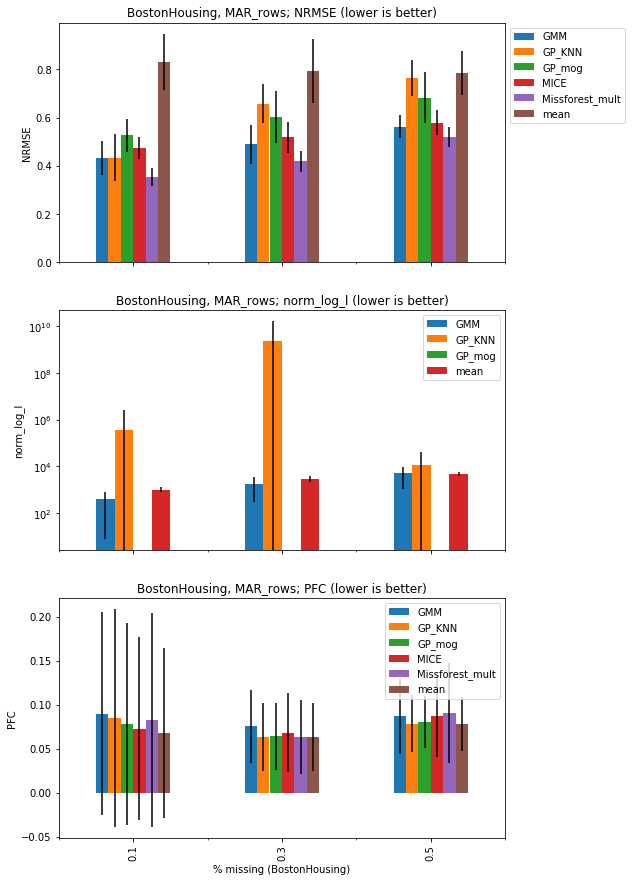

In [341]:
f, axes = plt.subplots(3, 1, sharex=True, sharey='row', figsize=(8, 15))
plot(axes[0], ("BostonHousing", "MAR_rows"), "NRMSE", "lower is better")
plot(axes[1], ("BostonHousing", "MAR_rows"), "norm_log_l", "lower is better", exclude=["Missforest_mult", "MICE"])
plot(axes[2], ("BostonHousing", "MAR_rows"), "PFC", "lower is better")

# Not Missing At Random, row by row
This data has been _amputed_ by:
  * Choosing some dimensions at random
  * Calculating the Xth percentile of the dimensions
  * Eliminating all the values in the Xth percentile.

This has an effect that only high values remain. Here the prior on the GP is the zero function, so the benefits of an externally known prior would not materialize.

BostonHousing, MNAR_rows; NRMSE (lower is better)


,GMM,GMM_std,GP_KNN,GP_KNN_prior,GP_KNN_prior_std,GP_KNN_std,GP_mog,GP_mog_prior,GP_mog_prior_std,GP_mog_std,MICE,MICE_std,Missforest_mult,Missforest_mult_std,mean,mean_std
0.1,1.291856,0.590432,1.801152,1.603707,1.044903,1.118135,1.795630,5.481945,0.189402,1.096677,1.407147,0.764113,1.321447,0.655400,2.133200,1.343185
0.3,1.398747,0.377676,1.561719,0.792211,0.001576,0.445284,1.588607,2.351271,0.037383,0.479093,1.350232,0.348230,1.283100,0.326472,1.720772,0.542596
0.5,1.563327,0.351295,1.610968,2.012055,0.183855,0.398142,1.651961,2.476933,0.254719,0.379784,1.463973,0.208231,1.492865,0.304538,1.678732,0.401184


BostonHousing, MNAR_rows; norm_log_l (lower is better)


,GMM,GMM_std,GP_KNN,GP_KNN_prior,GP_KNN_prior_std,GP_KNN_std,GP_mog,GP_mog_prior,MICE,Missforest_mult,Missforest_mult_std,mean,mean_std
0.1,-20011.480089,24633.380991,-1.286983e+07,-1.455874e+03,1.422173e+03,3.704412e+07,-inf,-inf,-inf,-7.374540e+06,1.065845e+07,-5.829385e+04,7.930691e+04
0.3,-93274.796260,39258.667307,-2.327545e+11,-1.351413e+06,5.455770e+03,4.054161e+11,-inf,-inf,-inf,-7.781154e+07,1.560534e+08,-6.174962e+05,6.884470e+05
0.5,-298443.547897,34263.385291,-5.728950e+306,-1.447208e+10,2.042958e+10,inf,-inf,-inf,-inf,-2.089381e+33,6.884307e+33,-1.263228e+07,6.213872e+06


Ionosphere, MNAR_rows; NRMSE (lower is better)


,GMM,GMM_std,GP_KNN,GP_KNN_prior,GP_KNN_prior_std,GP_KNN_std,GP_mog,GP_mog_prior,GP_mog_prior_std,GP_mog_std,MICE,MICE_std,Missforest_mult,Missforest_mult_std,mean,mean_std
0.1,2.019698,0.132798,2.140298,3.780012,NaN,0.174007,2.289689,4.481333,NaN,0.143092,2.116405,0.106802,2.248489,0.121121,2.313835,0.138916
0.3,1.742556,0.004583,1.844515,1.835551,0.007959,0.022509,1.912013,3.335686,0.141057,NaN,1.859380,0.004345,1.895283,0.002565,1.916369,NaN
0.5,1.752458,0.005014,1.822257,3.175777,0.022928,0.039611,1.835944,2.835924,0.120332,0.042891,1.806588,0.040635,1.804611,0.034259,1.836563,0.042610


Ionosphere, MNAR_rows; norm_log_l (lower is better)


,GMM,GMM_std,GP_KNN,GP_KNN_prior,GP_KNN_prior_std,GP_KNN_std,GP_mog,GP_mog_prior,GP_mog_std,MICE,Missforest_mult,Missforest_mult_std,mean,mean_std
0.1,-71047.506546,4307.842770,-9.128141e+03,-7.012943e+04,NaN,1.828632e+03,-inf,-inf,NaN,-inf,-1.162393e+06,2.883717e+05,-8.035699e+03,1.389553e+03
0.3,-141939.960968,5300.747516,-1.319092e+05,-1.883666e+05,2.951915e+04,6.734635e+03,-inf,-inf,NaN,-inf,-7.123541e+08,5.113380e+08,-1.488981e+05,NaN
0.5,-241785.622425,4741.800784,-9.398967e+08,-7.125367e+10,1.007464e+11,1.288253e+09,-6.865870e+06,-inf,5.326443e+06,-inf,-inf,NaN,-2.047739e+07,1.590195e+07


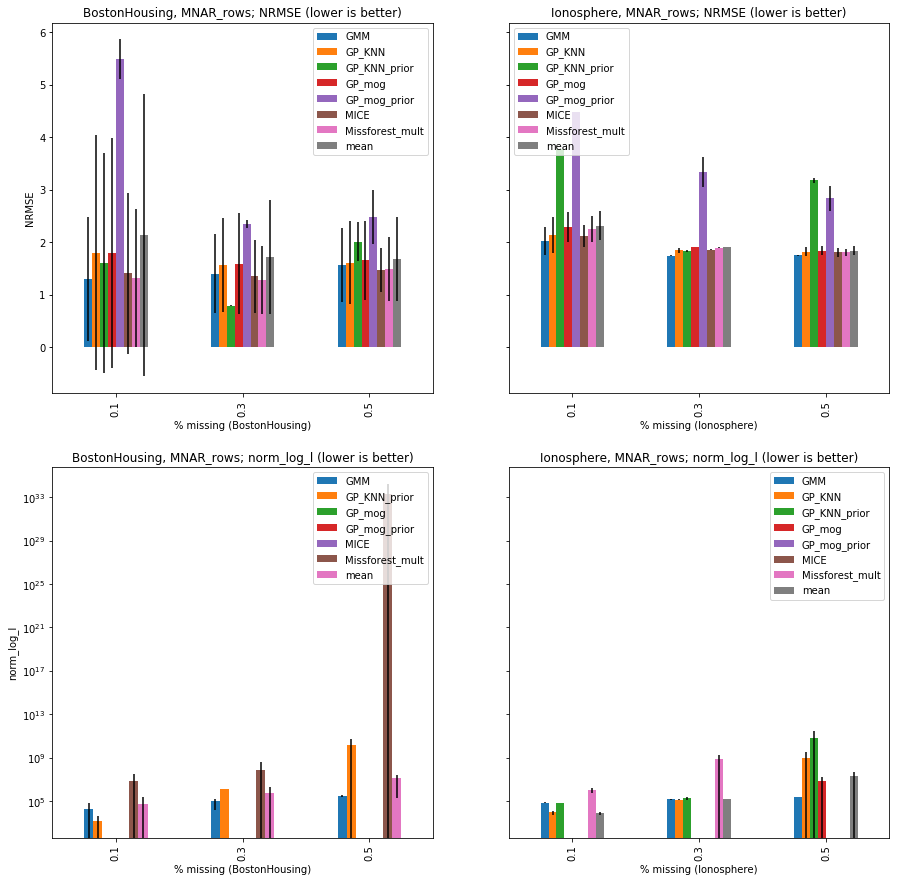

In [342]:
f, axes = plt.subplots(2, 2, sharex=False, sharey='row')
plot(axes[0, 0], ("BostonHousing", "MNAR_rows"), "NRMSE", "lower is better")
plot(axes[1, 0], ("BostonHousing", "MNAR_rows"), "norm_log_l", "lower is better", exclude=["GP_KNN"], loc=1, bbox_to_anchor=None)
plot(axes[0, 1], ("Ionosphere", "MNAR_rows"), "NRMSE", "lower is better", loc=2, bbox_to_anchor=None)
plot(axes[1, 1], ("Ionosphere", "MNAR_rows"), "norm_log_l", "lower is better", loc=1, bbox_to_anchor=None)


# NMAR but with some randomisation

The amputation mechanism is the same as the NMAR one, but now instead of cutting off all values above a certain level, we cut them off randomly with some probability. This should be fairer to methods that don't receive a good prior beforehand.

BostonHousing, MNAR_R_rows; NRMSE (lower is better)


,GMM,GMM_std,GP_KNN,GP_KNN_prior,GP_KNN_prior_std,GP_KNN_std,GP_mog,GP_mog_prior,GP_mog_prior_std,GP_mog_std,MICE,MICE_std,Missforest_mult,Missforest_mult_std,mean,mean_std
0.1,0.983052,0.232272,0.401569,2.260230,0.259275,NaN,1.101171,5.086077,NaN,NaN,1.136380,NaN,0.539256,NaN,2.006272,NaN
0.3,0.408085,0.048246,0.354186,0.343113,0.007755,NaN,NaN,2.867355,1.179499,NaN,0.531972,NaN,0.362723,NaN,1.009666,NaN
0.5,0.632950,0.008383,0.752430,1.568386,0.540337,0.076853,0.856066,4.662480,1.729181,0.188341,0.753711,0.131047,0.512799,0.021187,1.387369,0.426248


BostonHousing, MNAR_R_rows; norm_log_l (lower is better)


/home/adria/venv/lib/python3.5/site-packages/numpy/ma/core.py:6592: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


,GMM,GMM_std,GP_KNN,GP_KNN_prior,GP_KNN_prior_std,GP_KNN_std,GP_mog,GP_mog_prior,GP_mog_std,MICE,Missforest_mult,Missforest_mult_std,mean,mean_std
0.1,-36.169594,0.763932,-1.398312e+01,-4.319887e+06,8.871295e+04,NaN,-138.951415,-inf,NaN,-87.386446,-3.028914e+03,NaN,-173.947975,NaN
0.3,-274.761817,247.680633,-3.044993e+305,1.273709e+01,7.983683e+02,NaN,NaN,-inf,NaN,-inf,-5.096404e+277,NaN,-1212.184825,NaN
0.5,-553.165968,84.733593,-6.783454e+02,-6.266794e+06,8.451370e+06,16.6905,-1543.368140,-inf,47.019017,-inf,-9.976365e+04,106035.616621,-1644.605070,120.696673


Ionosphere, MNAR_R_rows; NRMSE (lower is better)


,GMM,GMM_std,GP_KNN,GP_KNN_prior,GP_KNN_prior_std,GP_KNN_std,GP_mog,GP_mog_prior,GP_mog_prior_std,GP_mog_std,MICE,MICE_std,Missforest_mult,Missforest_mult_std,mean,mean_std
0.1,1.892220,NaN,1.892768,3.364331,NaN,NaN,2.117071,5.874415,NaN,NaN,1.770577,NaN,1.712814,NaN,2.249945,NaN
0.3,0.889303,0.000000,NaN,0.687700,0.022952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.5,1.180121,0.033672,1.069731,1.694346,0.036541,0.051042,1.392946,4.444252,0.071658,0.036334,1.062766,0.014425,0.943515,0.018187,1.499052,0.041466


Ionosphere, MNAR_R_rows; norm_log_l (lower is better)


,GMM,GMM_std,GP_KNN,GP_KNN_prior,GP_KNN_prior_std,GP_KNN_std,GP_mog,GP_mog_prior,GP_mog_std,MICE,Missforest_mult,Missforest_mult_std,mean,mean_std
0.1,-5474.798269,NaN,-375.217057,-18626.081299,NaN,NaN,-359.767715,-inf,NaN,-inf,-16390.511280,NaN,-463.970847,NaN
0.3,-17196.428566,0.000000,NaN,-640.880942,69.681666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.5,-30312.580148,2093.779962,-1717.676541,-42726.059924,5744.298971,13.164589,-3471.459888,-inf,15.623994,-inf,-94619.824822,12636.282117,-3771.807739,28.226917


(359.76771455440894, 10000.0)

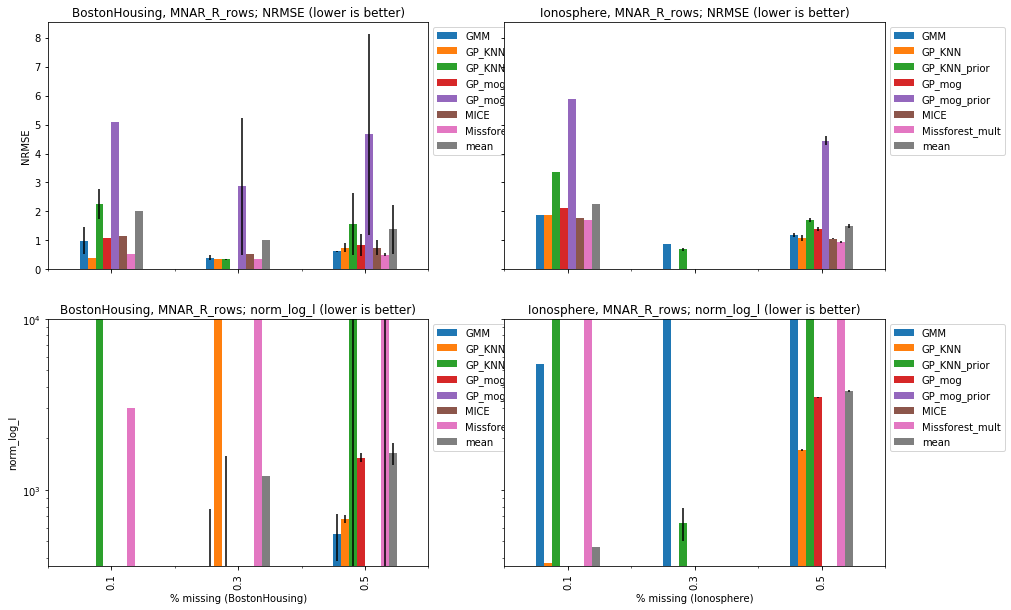

In [348]:
f, axes = plt.subplots(2, 2, sharex=True, sharey='row', figsize=(15, 10))
plot(axes[0, 0], ("BostonHousing", "MNAR_R_rows"), "NRMSE", "lower is better")
plot(axes[1, 0], ("BostonHousing", "MNAR_R_rows"), "norm_log_l", "lower is better")
plot(axes[0, 1], ("Ionosphere", "MNAR_R_rows"), "NRMSE", "lower is better")
plot(axes[1, 1], ("Ionosphere", "MNAR_R_rows"), "norm_log_l", "lower is better")
axes[1, 1].set_ylim(0, 1e4)

# MCAR independent

Each cell has the same independent probability of being missing.

BostonHousing, MCAR_total; NRMSE (lower is better)


,GMM,GMM_std,GP_KNN,GP_KNN_std,MICE,MICE_std,Missforest_mult,mean,mean_std
0.1,0.340023,0.026000,0.323944,0.032027,0.420184,0.018567,0.291342,0.723528,0.028884
0.3,0.419492,0.014974,0.399276,0.013622,0.458451,0.013022,0.322866,0.723194,0.011790
0.5,0.474432,0.008118,0.583097,0.003601,0.509630,0.023743,0.392444,0.723596,0.005131
0.7,0.544527,0.008442,0.720775,0.006867,0.572970,0.015665,0.514803,0.726942,0.005367
0.9,0.694411,0.016116,0.757227,0.009848,NaN,NaN,0.724234,0.736485,0.002072


BostonHousing, MCAR_total; norm_log_l (lower is better)


/home/adria/venv/lib/python3.5/site-packages/numpy/ma/core.py:6592: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


,GMM,GP_KNN,MICE,MICE_std,Missforest_mult,mean,mean_std
0.1,-inf,-inf,-2.936281e+307,inf,-1.047560e+27,-829.348508,44.160516
0.3,-inf,-inf,-inf,NaN,-1.763781e+27,-2587.750931,84.430831
0.5,-inf,-inf,-inf,NaN,-1.288550e+303,-4324.421541,93.795382
0.7,-inf,-inf,-inf,NaN,-9.835665e+301,-6120.241636,170.995175
0.9,-inf,-inf,NaN,NaN,-1.612491e+05,-8339.466459,193.717302


BostonHousing, MCAR_total; PFC (lower is better)


,GMM,GMM_std,GP_KNN,GP_KNN_std,MICE,MICE_std,Missforest_mult,mean,mean_std
0.1,0.056090,0.019493,0.046391,0.031297,0.042132,0.018657,0.018868,0.032892,0.015212
0.3,0.074933,0.012707,0.059847,0.019010,0.063439,0.010612,0.075000,0.063653,0.012576
0.5,0.072286,0.020301,0.069237,0.011430,0.079261,0.017958,0.097959,0.069237,0.011430
0.7,0.071734,0.007711,0.066882,0.008428,0.078657,0.006431,0.063712,0.066882,0.008428
0.9,0.081449,0.012346,0.072578,0.003665,0.380528,0.536482,0.082405,0.069636,0.001828


Ionosphere, MCAR_total; NRMSE (lower is better)


,GMM,GMM_std,GP_KNN,GP_KNN_std,GP_mog,MICE,MICE_std,Missforest_mult,mean,mean_std
0.1,0.784055,0.060186,0.675791,0.023,0.787725,0.788582,0.020662,0.629526,0.927657,0.011491
0.3,0.868233,NaN,0.694256,NaN,0.830140,0.794809,NaN,0.649896,0.924532,NaN
0.5,0.840861,NaN,0.756948,NaN,0.864980,0.798345,NaN,0.671400,0.924360,NaN
0.7,0.889912,NaN,0.927205,NaN,0.912161,0.846144,NaN,0.734135,0.927450,NaN
0.9,0.978690,NaN,0.944059,NaN,0.938717,NaN,NaN,0.924951,NaN,NaN


Ionosphere, MCAR_total; norm_log_l (lower is better)


,GMM,GP_KNN,GP_mog,MICE,Missforest_mult,mean,mean_std
0.1,-inf,-inf,-inf,-inf,-33806.528378,-1589.574354,61.042061
0.3,-3.529554e+04,-1.670949e+03,-inf,-inf,-100663.372313,-4823.135404,NaN
0.5,-3.818274e+04,-4.032087e+03,-inf,-inf,-152665.622047,-7948.422502,NaN
0.7,-6.073604e+04,-1.165824e+04,-inf,-8.774086e+307,-242398.777919,-11492.959859,NaN
0.9,-9.813419e+04,-4.526979e+05,-inf,NaN,-204815.848086,NaN,NaN


BostonHousing, MCAR_total; PFC (lower is better)


,GMM,GMM_std,GP_KNN,GP_KNN_std,MICE,MICE_std,Missforest_mult,mean,mean_std
0.1,0.056090,0.019493,0.046391,0.031297,0.042132,0.018657,0.018868,0.032892,0.015212
0.3,0.074933,0.012707,0.059847,0.019010,0.063439,0.010612,0.075000,0.063653,0.012576
0.5,0.072286,0.020301,0.069237,0.011430,0.079261,0.017958,0.097959,0.069237,0.011430
0.7,0.071734,0.007711,0.066882,0.008428,0.078657,0.006431,0.063712,0.066882,0.008428
0.9,0.081449,0.012346,0.072578,0.003665,0.380528,0.536482,0.082405,0.069636,0.001828


(0, 0.12)

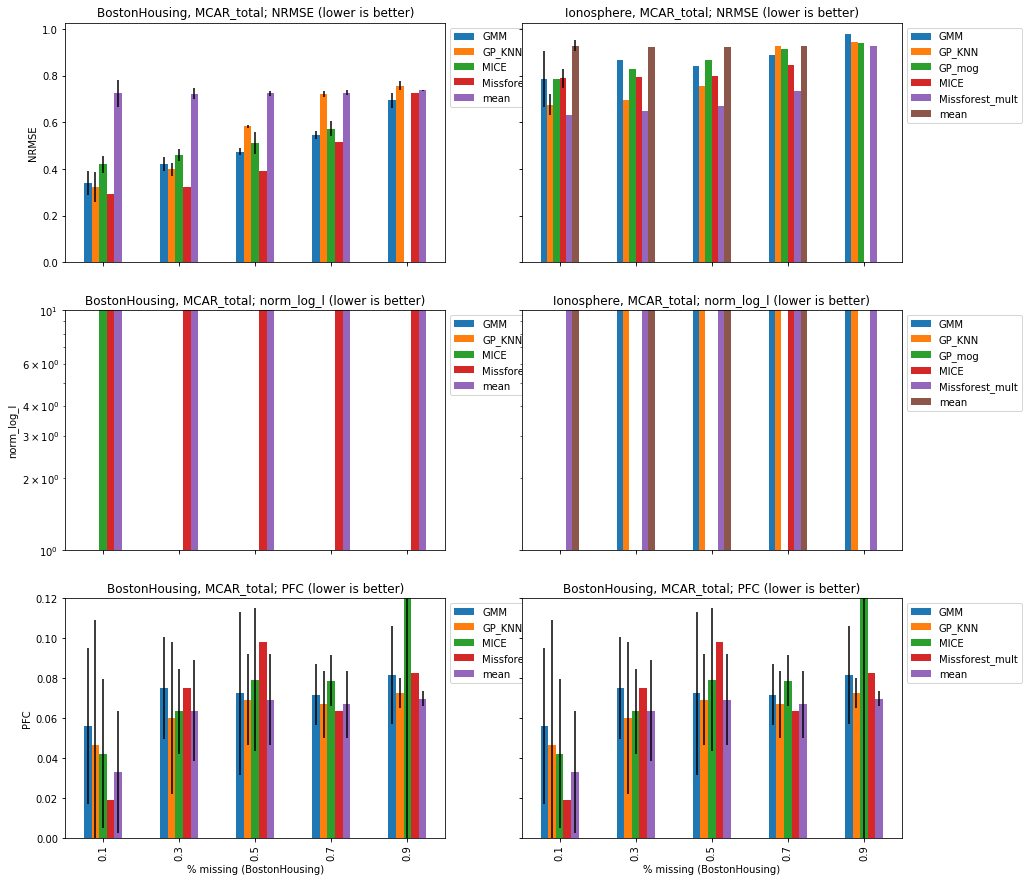

In [344]:
f, axes = plt.subplots(3, 2, sharex=True, sharey='row', figsize=(15, 15))
plot(axes[0, 0], ("BostonHousing", "MCAR_total"), "NRMSE", "lower is better")
plot(axes[1, 0], ("BostonHousing", "MCAR_total"), "norm_log_l", "lower is better")
plot(axes[2, 0], ("BostonHousing", "MCAR_total"), "PFC", "lower is better")
plot(axes[0, 1], ("Ionosphere", "MCAR_total"), "NRMSE", "lower is better")
plot(axes[1, 1], ("Ionosphere", "MCAR_total"), "norm_log_l", "lower is better")
plot(axes[2, 1], ("BostonHousing", "MCAR_total"), "PFC", "lower is better")
axes[2, 1].set_ylim(0, 0.12)
axes[2, 0].set_ylim(0, 0.12)

# MCAR Rows

Each _row_ has the same independent probability $p$ of having $d \cdot q$ entries missing.

BostonHousing, MCAR_rows; NRMSE (lower is better)


,GMM,GMM_std,GP_KNN,GP_KNN_std,MICE,MICE_std,Missforest_mult,mean,mean_std
0.1,0.362085,0.018928,0.368791,0.048952,0.431173,0.041375,0.284003,0.713072,0.007118
0.3,0.445817,0.025917,0.640976,0.016066,0.523395,0.019862,0.410368,0.728305,0.011293


BostonHousing, MCAR_rows; norm_log_l (lower is better)


,GMM,GMM_std,GP_KNN,MICE,Missforest_mult,mean,mean_std
0.1,-inf,inf,-inf,-inf,-2.318337e+26,-803.821690,73.712406
0.3,-inf,NaN,-inf,-inf,-2.890963e+302,-2584.192945,49.766798


BostonHousing, MCAR_rows; PFC (lower is better)


,GMM,GMM_std,GP_KNN,GP_KNN_std,MICE,MICE_std,Missforest_mult,mean,mean_std
0.1,0.087364,0.048432,0.080453,0.033423,0.087364,0.048432,0.116279,0.081550,0.040890
0.3,0.075161,0.023805,0.075161,0.018566,0.078387,0.023922,0.078431,0.073548,0.021363


Ionosphere, MCAR_rows; NRMSE (lower is better)


,GMM,GP_KNN,MICE,Missforest_mult,mean
0.1,0.822315,0.600628,0.661814,0.591140,0.907452
0.3,0.816513,0.705784,0.755453,0.642163,0.911770


Ionosphere, MCAR_rows; norm_log_l (lower is better)


,GMM,GP_KNN,MICE,Missforest_mult,mean
0.1,-8539.803161,-389.854265,-3.063148e+03,-44591.804715,-1642.590998
0.3,-21279.610914,-2725.730178,-3.280525e+31,-127861.000087,-4743.681697


BostonHousing, MCAR_rows; PFC (lower is better)


,GMM,GMM_std,GP_KNN,GP_KNN_std,MICE,MICE_std,Missforest_mult,mean,mean_std
0.1,0.087364,0.048432,0.080453,0.033423,0.087364,0.048432,0.116279,0.081550,0.040890
0.3,0.075161,0.023805,0.075161,0.018566,0.078387,0.023922,0.078431,0.073548,0.021363


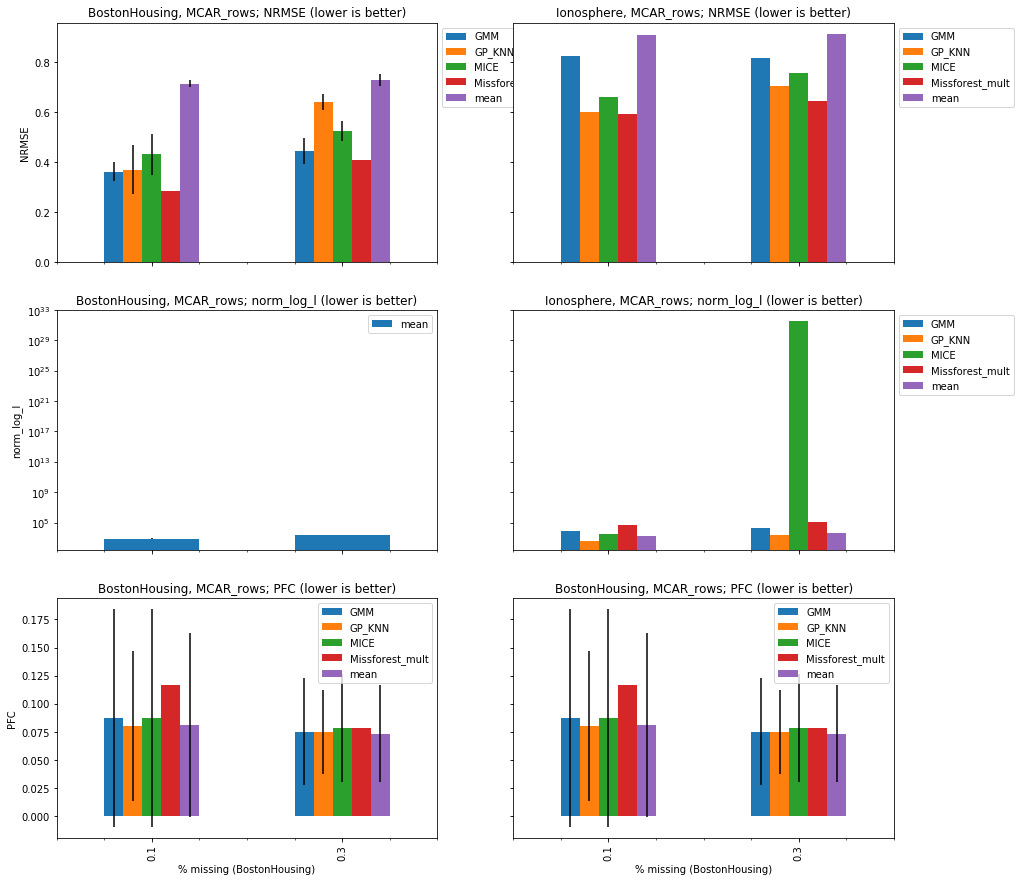

In [345]:
f, axes = plt.subplots(3, 2, sharex=True, sharey='row', figsize=(15, 15))
plot(axes[0, 0], ("BostonHousing", "MCAR_rows"), "NRMSE", "lower is better")
plot(axes[1, 0], ("BostonHousing", "MCAR_rows"), "norm_log_l", "lower is better",
     exclude=["GMM", "GMM_std", "GP_KNN", "MICE", "Missforest_mult"])
plot(axes[2, 0], ("BostonHousing", "MCAR_rows"), "PFC", "lower is better")
plot(axes[0, 1], ("Ionosphere", "MCAR_rows"), "NRMSE", "lower is better")
plot(axes[1, 1], ("Ionosphere", "MCAR_rows"), "norm_log_l", "lower is better")
plot(axes[2, 1], ("BostonHousing", "MCAR_rows"), "PFC", "lower is better")
#axes[2, 1].set_ylim(0, 0.12)
#axes[2, 0].set_ylim(0, 0.12)